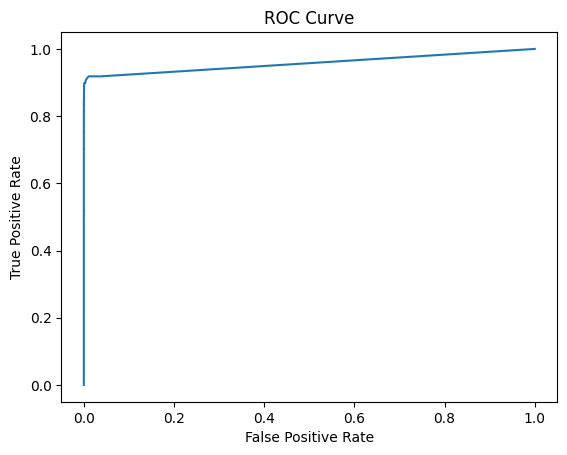

AUC: 0.9575000107668278


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../data/creditcard.csv")

X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(class_weight='balanced', n_estimators=200)
rf.fit(X_train, y_train)

pred_prob = rf.predict_proba(X_test)[:,1]

# ROC Curve

fpr, tpr, _ = roc_curve(y_test, pred_prob)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("AUC:", roc_auc_score(y_test, pred_prob))
